In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import os

In [20]:
os.chdir("D:\\meridianthe4\\PML\\Datasets")

In [21]:
milk = pd.read_csv("milk.csv", index_col=0)
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(milk)

In [22]:
km = KMeans(n_clusters=4, random_state=25)
km.fit(df_scaled)
silhouette_score(df_scaled, labels=km.labels_)

0.42324551444775393

In [23]:
clusters = [2, 3, 4, 5, 6, 7, 8]
scores = []
for k in clusters:
    km = KMeans(n_clusters=k, random_state=25)
    km.fit(df_scaled)
    score = silhouette_score(df_scaled, labels=km.labels_)
    scores.append([k, score])
df_scores = pd.DataFrame(scores, columns=["Clusters", "Score"])
df_scores.sort_values(by="Score", ascending=False)

,Clusters,Score
0,2,0.525851
2,4,0.423246
4,6,0.412161
3,5,0.399843
5,7,0.398780
6,8,0.397209
1,3,0.353503


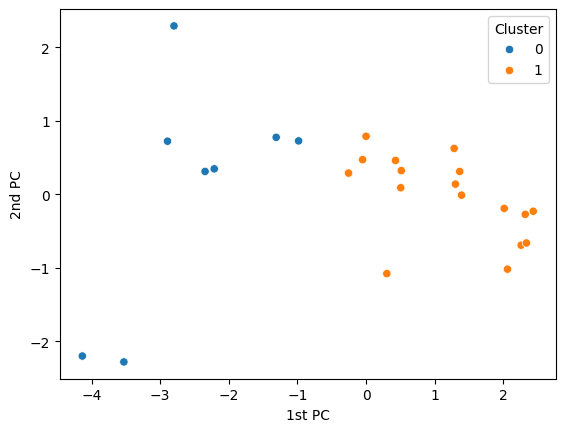

In [24]:
pccomp = PCA().set_output(transform='pandas')
pcdata = pccomp.fit_transform(df_scaled)
clust = KMeans(n_clusters=2, random_state=25)
clust.fit(df_scaled)
pcdata = pcdata.iloc[:,:2]
pcdata['Cluster'] = clust.labels_
sns.scatterplot(data=pcdata, x='pca0', y='pca1', hue='Cluster')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

### Cluster Analysis

In [25]:
km = KMeans(n_clusters=2, random_state=25)
km.fit(df_scaled)
df_cluster = milk.copy()
df_cluster['Cluster'] = km.labels_
df_cluster.groupby('Cluster').mean()

,water,protein,fat,lactose,ash
Cluster,,,,,
0,63.362500,10.412500,21.662500,1.975000,1.347500
1,85.158824,4.235294,4.964706,5.147059,0.635294


### Nutrients

In [27]:
nut = pd.read_csv("nutrient.csv", index_col=0)
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(nut)

In [28]:
km = KMeans(n_clusters=4, random_state=25)
km.fit(df_scaled)
silhouette_score(df_scaled, labels=km.labels_)

0.41997441967765275

In [29]:
clusters = [2, 3, 4, 5, 6, 7, 8]
scores = []
for k in clusters:
    km = KMeans(n_clusters=k, random_state=25)
    km.fit(df_scaled)
    score = silhouette_score(df_scaled, labels=km.labels_)
    scores.append([k, score])
df_scores = pd.DataFrame(scores, columns=["Clusters", "Score"])
df_scores.sort_values(by="Score", ascending=False)

,Clusters,Score
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
6,8,0.377523
1,3,0.357822
0,2,0.325778


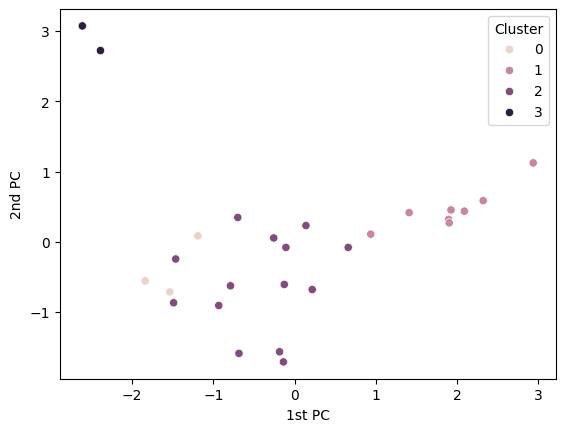

In [30]:
pccomp = PCA().set_output(transform='pandas')
pcdata = pccomp.fit_transform(df_scaled)
clust = KMeans(n_clusters=4, random_state=25)
clust.fit(df_scaled)
pcdata = pcdata.iloc[:,:2]
pcdata['Cluster'] = clust.labels_
sns.scatterplot(data=pcdata, x='pca0', y='pca1', hue='Cluster')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

In [32]:
km = KMeans(n_clusters=4, random_state=25)
km.fit(df_scaled)
df_cluster = nut.copy()
df_cluster['Cluster'] = km.labels_
df_cluster.groupby('Cluster').mean()

,energy,protein,fat,calcium,iron
Cluster,,,,,
0,151.666667,18.333333,7.666667,227.666667,1.666667
1,341.875000,18.750000,28.875000,8.750000,2.437500
2,163.928571,20.714286,7.714286,19.857143,2.028571
3,57.500000,9.000000,1.000000,78.000000,5.700000
